# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [46]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier

In [10]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [12]:
spaceship.dropna(inplace=True)

features = spaceship.select_dtypes(include=['number'])
target = spaceship['Transported']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

**Perform Train Test Split**

In [13]:
#your code here
#above

**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train_norm, y_train)
knn.score(X_test_norm, y_test)
pred = knn.predict(X_test_norm)
print("Classification Report:")
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.65      0.74       653
        True       0.73      0.90      0.81       669

    accuracy                           0.78      1322
   macro avg       0.80      0.78      0.78      1322
weighted avg       0.80      0.78      0.78      1322



In [24]:
# just for trying out linear regression :O

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train_norm, y_train)
pred = lin_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

MAE 0.43598648838740195
RMSE 0.45534169553175025
R2 score 0.1705342614567591


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
tree = DecisionTreeClassifier(random_state=42, max_depth=7)
tree.fit(X_train_norm, y_train)

pred = tree.predict(X_test_norm)

accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

Accuracy: 0.7851739788199698
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.72      0.77       653
        True       0.76      0.85      0.80       669

    accuracy                           0.79      1322
   macro avg       0.79      0.78      0.78      1322
weighted avg       0.79      0.79      0.78      1322

Confusion Matrix:
[[472 181]
 [103 566]]


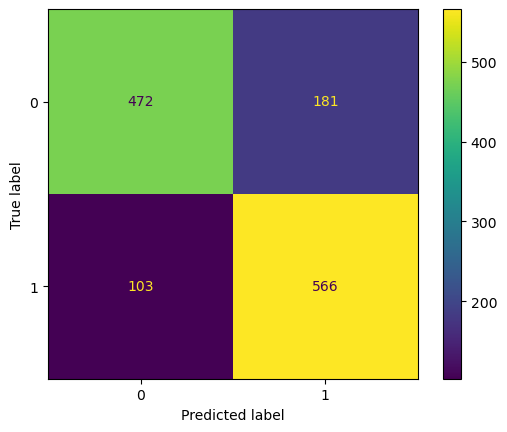

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [30]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train_norm, y_train)

# Predict the test set labels
pred = log_reg.predict(X_test_norm)

# Print classification metrics
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred, average='binary'))
print("Recall:", recall_score(y_test, pred, average='binary'))
print("F1 Score:", f1_score(y_test, pred, average='binary'))


Accuracy: 0.7443267776096822
Precision: 0.6840934371523916
Recall: 0.9192825112107623
F1 Score: 0.7844387755102041


- Bagging and Pasting

In [60]:
bagging_cl = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)
bagging_cl.fit(X_train_norm, y_train)
pred = bagging_cl.predict(X_test_norm)

print("Classification Report:")
print(classification_report(y_test, pred))
bagging_cl.score(X_test_norm, y_test)

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.74      0.78       653
        True       0.77      0.85      0.81       669

    accuracy                           0.80      1322
   macro avg       0.80      0.80      0.80      1322
weighted avg       0.80      0.80      0.80      1322



0.7972768532526475

- Random Forests

In [62]:
forest = RandomForestClassifier(n_estimators=100,
                               max_depth = 20)
forest.fit(X_train_norm, y_train)
pred = forest.predict(X_test_norm)

print("Classification Report:")
print(classification_report(y_test, pred))
forest.score(X_test_norm, y_test)

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.73      0.78       653
        True       0.77      0.86      0.81       669

    accuracy                           0.79      1322
   macro avg       0.80      0.79      0.79      1322
weighted avg       0.80      0.79      0.79      1322



0.794251134644478

- Gradient Boosting

In [64]:
gb_cl = GradientBoostingClassifier(n_estimators=100,
                               max_depth = 20)
gb_cl.fit(X_train_norm, y_train)
pred = gb_cl.predict(X_test_norm)

print("Classification Report:")
print(classification_report(y_test, pred))
gb_cl.score(X_test_norm, y_test)

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.64      0.71       653
        True       0.70      0.85      0.77       669

    accuracy                           0.74      1322
   macro avg       0.75      0.74      0.74      1322
weighted avg       0.75      0.74      0.74      1322



0.74357034795764

- Adaptive Boosting

In [68]:
ada_cl = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100)
ada_cl.fit(X_train_norm, y_train)
pred = ada_cl.predict(X_test_norm)

print("Classification Report:")
print(classification_report(y_test, pred))
ada_cl.score(X_test_norm, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.63      0.72       653
        True       0.71      0.87      0.78       669

    accuracy                           0.75      1322
   macro avg       0.77      0.75      0.75      1322
weighted avg       0.77      0.75      0.75      1322



0.754160363086233

Which model is the best and why?

-Baggingis slightly better than randomforest, both are better than the two boosters, which perform similarly
-Bagging Classifier is the best model here due to its high accuracy and balanced metrics, particularly excelling in capturing True cases while maintaining good performance on False cases.

Why are bagging and rf better than the boosters?
-they both handle imbalance in the data better than the boosters
-they handle noisy features better than the booters
-Bagging methods, such as Bagging Classifier and Random Forest, reduce variance in predictions by averaging multiple models. This works well if your data has high variance, as the ensemble can average out the noise.
-Boosting methods can sometimes amplify variance, as each new model attempts to correct the mistakes of the previous model. If your dataset has high variance, boosting can lead to overfitting, which might explain the lower accuracy of Gradient Boosting and AdaBoost.
-also boosted & rf are less sensitive too unscaled data than boosters, but that doesnt apply here as the data is normalized anyways